<a href="https://colab.research.google.com/github/vitorscience/Data-Science/blob/main/classifica_o_com_pycaret_sa_de_fetal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**


---

# Classificação com PyCaret - Saúde Fetal

A taxa de mortalidade infantil é um problema de saúde pública que pode ser reduzido com a aplicação de métodos eficazes de diagnóstico. Um desses métodos é o cardiotocograma, uma técnica que auxilia na identificação de possíveis problemas no feto ainda no útero materno, permitindo intervenções precoces para garantir a saúde do bebê e da mãe.

# PyCaret

O primeiro passo será a instalação do PyCaret. O PyCaret é uma biblioteca utilizada para automação de machine learning. Ela simplifica os processos, oferecendo uma vasta gama de funcionalidades e automatizando parte das etapas do processo.

In [ ]:
# instalando a biblioteca
!pip install pycaret -q
!pip install mlflow -q
!pip install scipy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.7 MB/s eta 0:00:00
   ━━━

In [ ]:
pip install pycaret==2.3.10 -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 28.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
pip install pandas-profiling -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.6 MB/s eta 0:00:00


In [ ]:
!pip install -U pandas-profiling -q


In [ ]:
#importando as bibiotecas nescesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import pycaret
from pycaret.classification import *
from sklearn.model_selection import train_test_split


In [ ]:
# Importando os pacotes necessarios

from rich.console import Console
from rich import print
from rich.panel import Panel
from rich.table import Table
import kagglehub
import os
%matplotlib inline

No projeto abordado, será utilizada uma fonte de dados do Kaggle. O Kaggle é uma plataforma de ciência de dados que reúne diversas fontes de dados e diferentes cases, criando uma comunidade de profissionais. Os dados que serão tratados são de eletrocardiotocograma.

In [ ]:
# Certifique-se de que você já tem a chave de API do Kaggle configurada no ambiente
# Configurando o diretório para salvar o dataset
dataset_path = "andrewmvd/fetal-health-classification"
output_path = "./datasets/fetal_health_classification"

# Verifica e cria o diretório de saída, se necessário
os.makedirs(output_path, exist_ok=True)

# Fazendo o download do dataset usando Kaggle API
!kaggle datasets download -d {dataset_path} -p {output_path} --unzip

# Lendo o dataset CSV em um DataFrame pandas
file_path = os.path.join(output_path, "fetal_health.csv")
df = pd.read_csv(file_path)


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification
License(s): other
  0% 0.00/45.8k [00:00<?, ?B/s]
100% 45.8k/45.8k [00:00<00:00, 71.1MB/s]


# Análise Exploratória
Após a extração dos dados, a próxima etapa do projeto é a análise exploratória. Esse processo consiste em examinar e entender a composição dos dados, com o objetivo de identificar padrões, inconsistências, valores ausentes ou discrepantes, e outras características relevantes. A análise exploratória é uma fase crucial, pois permite ganhar uma visão inicial do conjunto de dados, facilitando a identificação de potenciais problemas e oportunidades para melhorias.

Durante a análise exploratória, são aplicadas diversas técnicas, como visualizações gráficas (por exemplo, histogramas, boxplots e scatter plots) e estatísticas descritivas (como médias, medianas, desvios padrão, etc.), para entender melhor a distribuição dos dados e as relações entre as variáveis. Além disso, são realizadas verificações para garantir que os dados estão limpos e prontos para a fase de modelagem.

Após essa exploração inicial, realiza-se o tratamento de dados, que inclui a remoção ou correção de dados faltantes, a normalização de variáveis e a transformação de atributos, quando necessário. Esse processo de preparação é essencial para garantir que os dados estejam adequadamente estruturados para a construção de modelos de machine learning mais precisos e eficientes.

In [ ]:
#Primeiras 5 linhas do data frame
df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# Dicionário de Variaveis

**Um guia que fornece descrições conceituais de cada variável em nosso conjunto de dados.**

baseline value:a frequência cardíaca fetal (FCF);

accelerations: Número de acelerações por segundo;

fetal_movement: Número de movimentos fetais por segundo;

uterine_contractions: Número de contrações uterinas por segundo;

light_decelerations: Número de desacelerações leves por segundo;

severe_decelerations: Número de desacelerações severas por segundo;

prolongued_decelerations: Número de desacelerações prolongadas por segundo;

abnormal_short: Porcentagem de tempo com variabilidade anormal de curto prazo;

mean_value_of_short_term_variability:Valor médio da variabilidade de curto prazo;

percentage_of_time:Porcentagem de tempo com variabilidade anormal de longo prazo;

mean_value_of_long: Valor médio da variabilidade de longo prazo;

histogram_width: Largura do histograma feito usando todos os valores de um registro;

histogram_min:O valor mínimo da FCF no histograma;

histogram_max: O valor maximo da FCF no histograma;

histogram_number_of_peaks:o número de picos distintos no histograma da FCF;

histogram_number_of_zeroes: o número de vezes que a FCF chega a zero no histograma.

histogram_mode: o valor mais comum no histograma da FCF;

histogram_mean: o valor médio da FCF no histograma.

histogram_median: o valor mediano da FCF no histograma.

histogram_variance: uma medida da dispersão da distribuição da FCF no histograma.

histogram_tendency : uma medida da dispersão da distribuição da FCF no histograma.

fetal_health: saúde fetal (1 — normal; 2 — Suspeito; 3 — Patológico).



Dados nulos impactam diretamente a performance dos modelos. Verificar o tipo de cada variável e identificar a presença de dados nulos no conjunto de dados é de extrema importância. Essa etapa é fundamental para garantir que os dados estejam completos e prontos para serem utilizados de forma eficiente na construção dos modelos.

In [ ]:

table =  Table(title='Informações das Variáveis')
table.add_column('Variable_name', justify='center')
table.add_column('Data_type', justify='center')
table.add_column('Unique_value', justify='center')
table.add_column('Missing_percentage', justify='center')
for column in df.columns:
  table.add_row(f'{column}', f'{df[column].dtypes}',
                f'{len(df[column].unique())}',
                f'{(df[column].isnull().sum())*100}')


In [ ]:
table

                                        Informações das Variáveis                                         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃                     Variable_name                      ┃ Data_type ┃ Unique_value ┃ Missing_percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│                     baseline value                     │  float64  │      48      │         0          │
│                     accelerations                      │  float64  │      20      │         0          │
│                     fetal_movement                     │  float64  │     102      │         0          │
│                  uterine_contractions                  │  float64  │      16      │         0          │
│                  light_decelerations                   │  float64  │      16      │         0          │
│                  severe_decelerations                  │  float64  │      2       │         0          │
│                prolongued_decelerations                │  float64  │      6       │         0          │
│            abnormal_short_term_variability             │  float64  │      75      │         0          │
│          mean_value_of_short_term_variability          │  float64  │      57      │         0          │
│ percentage_of_time_with_abnormal_long_term_variability │  float64  │      87      │         0          │
│          mean_value_of_long_term_variability           │  float64  │     249      │         0          │
│                    histogram_width                     │  float64  │     154      │         0          │
│                     histogram_min                      │  float64  │     109      │         0          │
│                     histogram_max                      │  float64  │      86      │         0          │
│               histogram_number_of_peaks                │  float64  │      18      │         0          │
│               histogram_number_of_zeroes               │  float64  │      9       │         0          │
│                     histogram_mode                     │  float64  │      88      │         0          │
│                     histogram_mean                     │  float64  │     103      │         0          │
│                    histogram_median                    │  float64  │      95      │         0          │
│                   histogram_variance                   │  float64  │     133      │         0          │
│                   histogram_tendency                   │  float64  │      3       │         0          │
│                      fetal_health                      │  float64  │      3       │         0          │
└────────────────────────────────────────────────────────┴───────────┴──────────────┴────────────────────┘

In [ ]:
# Calculando as porcentagens das categorias em 'fetal_health'
normal = (df.fetal_health.value_counts(normalize=True) * 100).values[0]
suspicious = (df.fetal_health.value_counts(normalize=True) * 100).values[1]
pathological = (df.fetal_health.value_counts(normalize=True) * 100).values[2]

# Exibindo o resultado de forma mais clara
print(f"Total de registros por categoria: "
      f"Normal: {round(normal, 2)}%, "
      f"Suspeito: {round(suspicious, 2)}%, "
      f"Patológico: {round(pathological, 2)}%")

Total de registros por categoria: Normal: 77.85%, Suspeito: 13.88%, Patológico: 8.28%

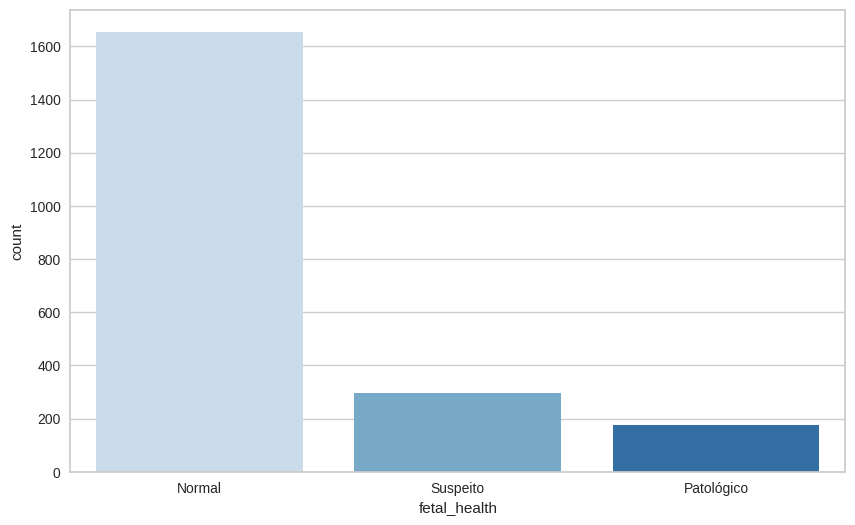

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
names = ['Normal', 'Suspeito', 'Patológico']
sns.countplot(x='fetal_health', data=df, palette='Blues', ax=ax)
ax.set_xticklabels(names)
plt.show()clf = setup(data=train, target='target')


Com o gráfico acima, é possível observar uma disparidade na distribuição das classificações. Um DataFrame desbalanceado em relação ao target pode impactar a forma como o modelo lida com os dados durante a fase de previsão.

In [ ]:
df.describe()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


  # Outliers
Outliers presentes na base de dados precisam ser identificados, pois podem impactar negativamente o desempenho do modelo. O gráfico boxplot é uma ferramenta útil para visualizar esses problemas, permitindo a detecção fácil de valores discrepantes que fogem do padrão esperado.

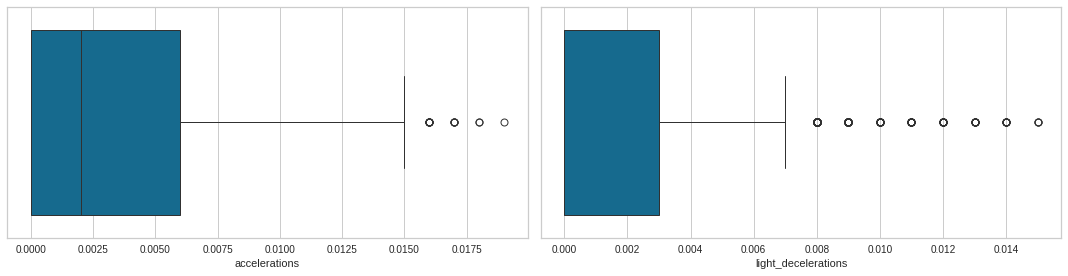

In [ ]:

fig, ax = plt.subplots(1,2,figsize=(15,4), dpi=72)
sns.boxplot(data=df, x="accelerations", ax=ax[0])
sns.boxplot(data=df, x="light_decelerations",  ax=ax[1])
plt.tight_layout()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

In [ ]:
scaler = StandardScaler()
df_clean = scaler.fit_transform(df.iloc[:, :21].copy())

In [ ]:

features = df_clean.copy()
target = df.fetal_health.values.copy()
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0, stratify=target, shuffle=True)

In [ ]:

from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
x_ada, y_ada = adasyn.fit_resample(x_train, y_train)

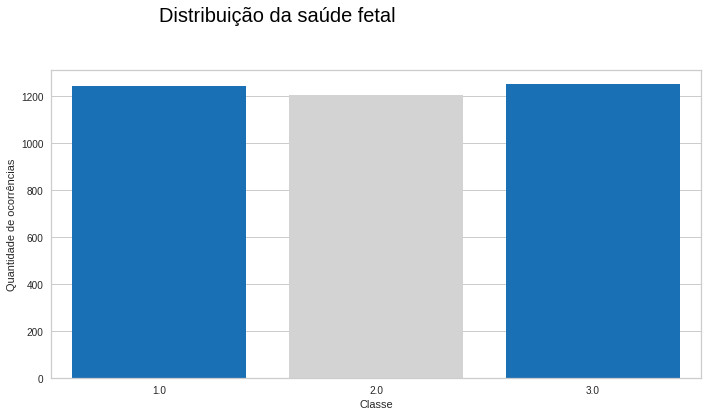

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6), dpi=72)

sns.countplot(x=y_ada, palette=['#0073CF', "#D3D3D3"], linewidth=0, edgecolor="none", ax=ax)
ax.text(-0, 1500, 'Distribuição da saúde fetal' ,
        fontsize=20, fontweight='medium',va='bottom', color='black')
ax.set_ylabel('Quantidade de ocorrências')
ax.set_xlabel('Classe')
plt.tight_layout()

Conforme o gráfico  os dados estão balanceados, a próxima etapa é criar um setup com os dados de treino para modelagem

In [ ]:

train = pd.DataFrame(x_ada, columns=df.columns[:21])
train['target'] = y_ada

In [ ]:
clf = setup(data=train, target='target')


,Description,Value
0,Session id,7075
1,Target,target
2,Target type,Multiclass
3,Target mapping,"1.0: 0, 2.0: 1, 3.0: 2"
4,Original data shape,"(3695, 22)"
5,Transformed data shape,"(3695, 22)"
6,Transformed train set shape,"(2586, 22)"
7,Transformed test set shape,"(1109, 22)"
8,Numeric features,21
9,Preprocess,True


# Modelagem

O processo de modelagem com o PyCaret facilita a comparação entre diferentes modelos de forma automatizada, permitindo avaliar rapidamente o desempenho de diversas abordagens e escolher a mais adequada para o problema em questão.

In [ ]:
best = compare_models(sort='Recall', n_select=5)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9760,0.9975,0.9760,0.9769,0.9760,0.9640,0.9645,0.3470
lightgbm,Light Gradient Boosting Machine,0.9760,0.9982,0.9760,0.9764,0.9760,0.9640,0.9642,5.1090
xgboost,Extreme Gradient Boosting,0.9741,0.9977,0.9741,0.9744,0.9741,0.9611,0.9613,0.6700
rf,Random Forest Classifier,0.9710,0.9975,0.9710,0.9716,0.9709,0.9565,0.9568,0.5330
gbc,Gradient Boosting Classifier,0.9652,0.0000,0.9652,0.9659,0.9652,0.9478,0.9481,4.2160
knn,K Neighbors Classifier,0.9443,0.9860,0.9443,0.9496,0.9439,0.9165,0.9193,0.1010
dt,Decision Tree Classifier,0.9393,0.9548,0.9393,0.9399,0.9391,0.9089,0.9094,0.1170
lr,Logistic Regression,0.8871,0.0000,0.8871,0.8920,0.8876,0.8306,0.8323,0.5320
ada,Ada Boost Classifier,0.8797,0.0000,0.8797,0.8832,0.8803,0.8196,0.8207,0.3700
lda,Linear Discriminant Analysis,0.8534,0.0000,0.8534,0.8641,0.8542,0.7801,0.7840,0.0360


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

A métrica escolhida para definir o modelo que melhor se adequou aos dados foi a Extra Trees Classifier. Este modelo apresentou os seguintes resultados de desempenho:

Acurácia (Accuracy): 97,60%
AUC (Area Under the Curve): 99,75%
Recall: 97,60%
Precisão (Precision): 97,69%
F1-Score: 97,60%
Kappa: 96,40%
MCC (Matthews Correlation Coefficient): 96,45%
Tempo de Treinamento (TT): 0,347 segundos
Esses resultados indicam que o modelo Extra Trees Classifier apresentou uma excelente performance em todas as métricas relevantes, tornando-se a escolha ideal para este conjunto de dados.

O Extra Trees Classifier é um algoritmo robusto e eficaz, indicado para uma variedade de problemas de classificação, especialmente quando é necessário alcançar alta precisão e evitar overfitting. Sua maior aleatoriedade em comparação ao Random Forest e o fato de utilizar toda a base de dados para o treinamento fazem dele uma escolha atraente, especialmente quando a velocidade e a resistência do modelo são prioridades.

In [ ]:
# verificando o melhor modelo
print(best[0])

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7075, verbose=0,
                     warm_start=False)

In [ ]:
tuned_et = tune_model(best[0], optimize='Recall')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9035,0.9749,0.9035,0.9058,0.9029,0.8552,0.8569
1,0.8842,0.9550,0.8842,0.8860,0.8827,0.8262,0.8285
2,0.8803,0.9609,0.8803,0.8850,0.8804,0.8204,0.8224
3,0.8842,0.9752,0.8842,0.8901,0.8831,0.8260,0.8301
4,0.8687,0.9692,0.8687,0.8740,0.8687,0.8030,0.8054
5,0.9073,0.9746,0.9073,0.9101,0.9061,0.8609,0.8634
6,0.8837,0.9662,0.8837,0.8936,0.8839,0.8254,0.8303
7,0.8760,0.9644,0.8760,0.8786,0.8761,0.8139,0.8150
8,0.8643,0.9656,0.8643,0.8709,0.8645,0.7965,0.7993


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


A melhor versão do modelo, já treinado em um conjunto de dados. Esse modelo é escolhido para ser ajustado em termos de suas hiperparâmetros.

In [ ]:
# veriificando os parâmetros
print(tuned_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7075, verbose=0,
                     warm_start=False)

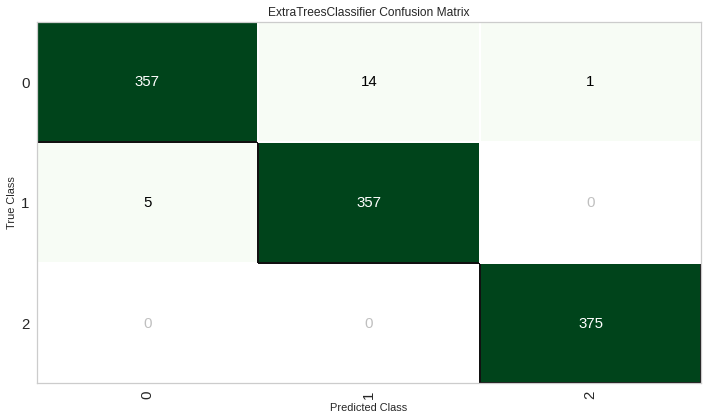

<Figure size 800x550 with 0 Axes>

In [ ]:

# plotando matriz de confusão
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
plot_model(tuned_et, plot='confusion_matrix')
plt.tight_layout()

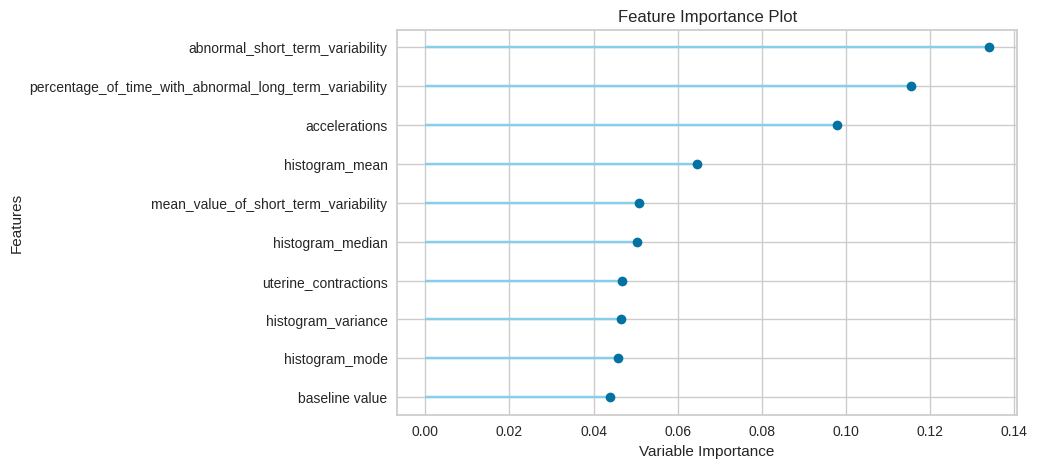

In [ ]:

# feature importances
plot_model(tuned_et, plot='feature')

O gráfico acima apresenta as variáveis que exercem o maior impacto no conjunto de dados, destacando os atributos mais relevantes para o modelo. Essas variáveis são as que influenciam de forma significativa as previsões, indicando quais fatores desempenham um papel crucial na análise e nos resultados gerados pelo modelo. A visualização ajuda a identificar os principais determinantes e oferece insights valiosos sobre o comportamento dos dados, facilitando a interpretação e a compreensão do modelo.


In [ ]:

# finalizando o modelo
final_et = finalize_model(tuned_et)

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
test = pd.DataFrame(x_test, columns=df.columns[:21])
test['target'] = y_test

In [ ]:
# fazendo previsões com conjunto de teste
test_preds = predict_model(final_et, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9380,0.9839,0.9380,0.9384,0.9381,0.8308,0.8309


In [ ]:
import scikitplot as skplt


Relatório de Classificação:
               precision    recall  f1-score   support

         1.0     0.9663    0.9686    0.9674       414
         2.0     0.7895    0.8108    0.8000        74
         3.0     0.9268    0.8636    0.8941        44

    accuracy                         0.9380       532
   macro avg     0.8942    0.8810    0.8872       532
weighted avg     0.9384    0.9380    0.9381       532

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

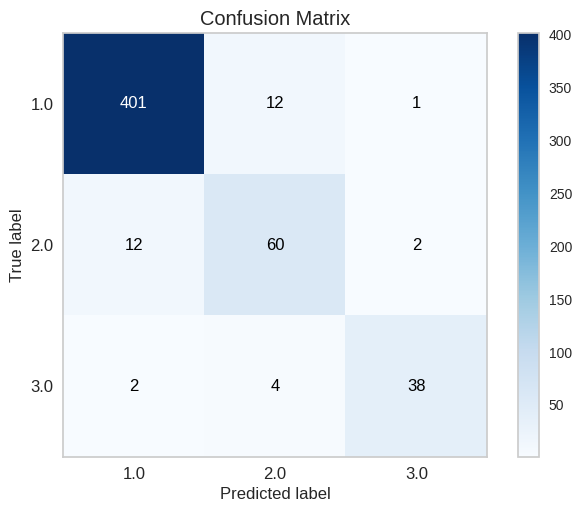

In [ ]:

print('Relatório de Classificação:\n', classification_report(test_preds['target'], test_preds['prediction_label'], digits=4))
skplt.metrics.plot_confusion_matrix(test_preds['target'], test_preds['prediction_label'])

**Conclusão**

O processo de classificação facilitou a modelagem de forma simplificada e ágil, permitindo a construção e a avaliação eficiente de modelos preditivos. A aplicação de algoritmos robustos, como o Extra Trees Classifier, contribuiu para a obtenção de resultados precisos e de alto desempenho, otimizando a análise dos dados. A abordagem adotada não apenas acelerou o desenvolvimento, mas também proporcionou uma melhor compreensão das variáveis mais influentes, garantindo que a modelagem fosse tanto eficaz quanto intuitiva. Em suma, a metodologia aplicada tornou o processo mais direto e com alto grau de assertividade, contribuindo para decisões informadas e precisas.

O modelo apresentou um desempenho geral de 93,80% de acurácia. Para as classes individuais:

Classe 1 (label 1.0): Obteve alta performance, com uma precisão de 96,63%, recall de 96,86% e f1-score de 96,74%, com 414 amostras.
Classe 2 (label 2.0): Apresentou um desempenho moderado, com precisão de 78,95%, recall de 81,08% e f1-score de 80,00%, com 74 amostras.
Classe 3 (label 3.0): Mostrou bons resultados, com precisão de 92,68%, recall de 86,36% e f1-score de 89,41%, com 44 amostras.
As médias macro e ponderada refletem uma boa distribuição de desempenho entre as classes, com valores de f1-score de 88,72% e 93,81%, respectivamente.

A matriz de confusão é uma ferramenta adicional para análise detalhada dos erros de classificação.